In [28]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from Wind.Config import wind_data, wind_data_ext, wind_path
import statsmodels.api as sm
from __future__ import division
%matplotlib inline

In [29]:
nc_fid = Dataset("/home/bejar/storage/Data/Wind/files/0/0.nc", 'r')

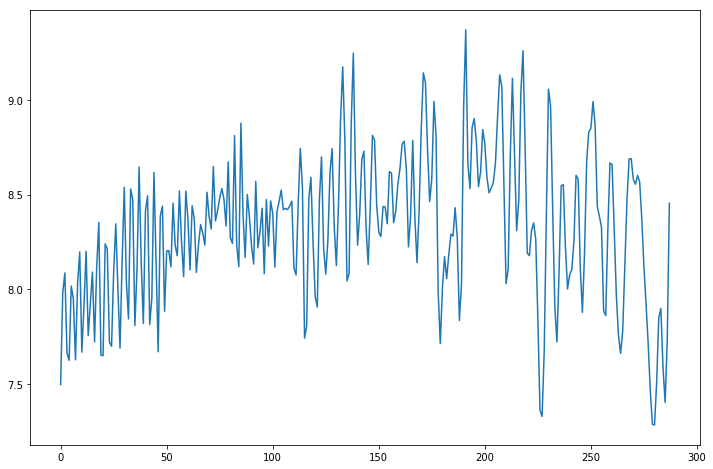

In [217]:
tseries = nc_fid.variables['wind_speed'][0:288]
fig = plt.figure(figsize=(12,8))
plt.plot(tseries)

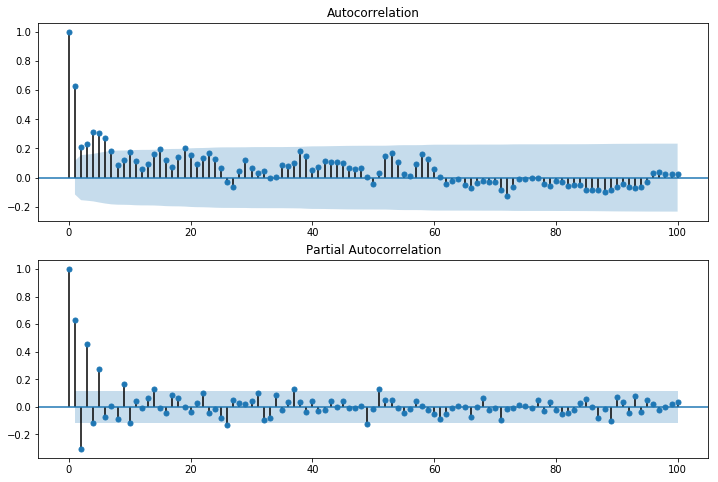

In [218]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tseries, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tseries, lags=100, ax=ax2)

In [219]:
arima_mod = sm.tsa.AR(tseries).fit(maxlag=100)
estord = sm.tsa.AR(tseries).select_order(maxlag=40, ic='aic')
print(estord)

17


In [211]:
arma_mod=sm.tsa.ARMA(tseries, (16,1)).fit()

In [187]:
print arma_mod.aic, arma_mod.bic, arma_mod.hqic
arma_mod.summary()

-404.336567771 -369.982280818 -391.279541496


<table class="simpletable">
<caption>ARMA Model Results</caption>
<tr>
  <th>Dep. Variable:</th>         <td>y</td>        <th>  No. Observations:  </th>   <td>1000</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARMA(4, 1)</td>    <th>  Log Likelihood     </th>  <td>209.168</td>
</tr>
<tr>
  <th>Method:</th>             <td>css-mle</td>     <th>  S.D. of innovations</th>   <td>0.196</td> 
</tr>
<tr>
  <th>Date:</th>          <td>Wed, 28 Jun 2017</td> <th>  AIC                </th> <td>-404.337</td>
</tr>
<tr>
  <th>Time:</th>              <td>10:36:39</td>     <th>  BIC                </th> <td>-369.982</td>
</tr>
<tr>
  <th>Sample:</th>                <td>0</td>        <th>  HQIC               </th> <td>-391.280</td>
</tr>
<tr>
  <th></th>                       <td> </td>        <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>        <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>   <td>    7.0785</td> <td>    0.426</td> <td>   16.615</td> <td> 0.000</td> <td>    6.244</td> <td>    7.914</td>
</tr>
<tr>
  <th>ar.L1.y</th> <td>    0.9263</td> <td>    0.034</td> <td>   27.209</td> <td> 0.000</td> <td>    0.860</td> <td>    0.993</td>
</tr>
<tr>
  <th>ar.L2.y</th> <td>   -0.3426</td> <td>    0.047</td> <td>   -7.296</td> <td> 0.000</td> <td>   -0.435</td> <td>   -0.251</td>
</tr>
<tr>
  <th>ar.L3.y</th> <td>    0.2635</td> <td>    0.047</td> <td>    5.649</td> <td> 0.000</td> <td>    0.172</td> <td>    0.355</td>
</tr>
<tr>
  <th>ar.L4.y</th> <td>    0.1263</td> <td>    0.034</td> <td>    3.740</td> <td> 0.000</td> <td>    0.060</td> <td>    0.192</td>
</tr>
<tr>
  <th>ma.L1.y</th> <td>    0.9293</td> <td>    0.012</td> <td>   77.046</td> <td> 0.000</td> <td>    0.906</td> <td>    0.953</td>
</tr>
</table>
<table class="simpletable">
<caption>Roots</caption>
<tr>
    <td></td>   <th>           Real</th> <th>         Imaginary</th> <th>         Modulus</th> <th>        Frequency</th>
</tr>
<tr>
  <th>AR.1</th>               1.0171                    -0.0000j                    1.0171                   -0.0000     
</tr>
<tr>
  <th>AR.2</th>               0.2411                    -1.4537j                    1.4736                   -0.2238     
</tr>
<tr>
  <th>AR.3</th>               0.2411                    +1.4537j                    1.4736                    0.2238     
</tr>
<tr>
  <th>AR.4</th>              -3.5850                    -0.0000j                    3.5850                   -0.5000     
</tr>
<tr>
  <th>MA.1</th>              -1.0761                    +0.0000j                    1.0761                    0.5000     
</tr>
</table>

In [188]:
print arima_mod.aic, arima_mod.bic, arima_mod.hqic
arima_mod.summary()

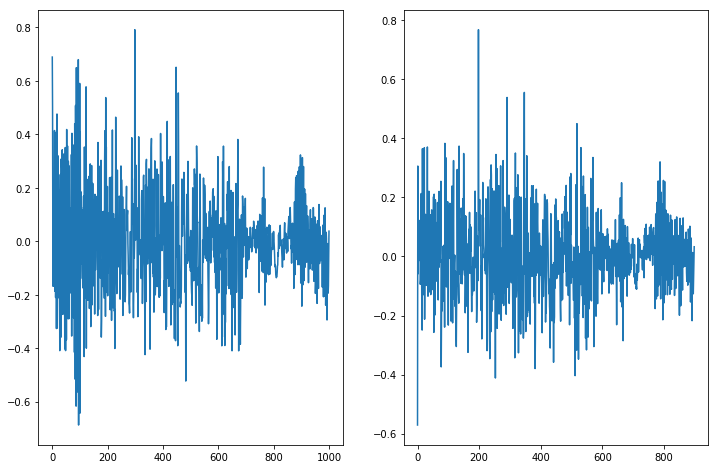

In [212]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
plt.plot(arma_mod.resid)
ax = fig.add_subplot(122)
plt.plot(arima_mod.resid)

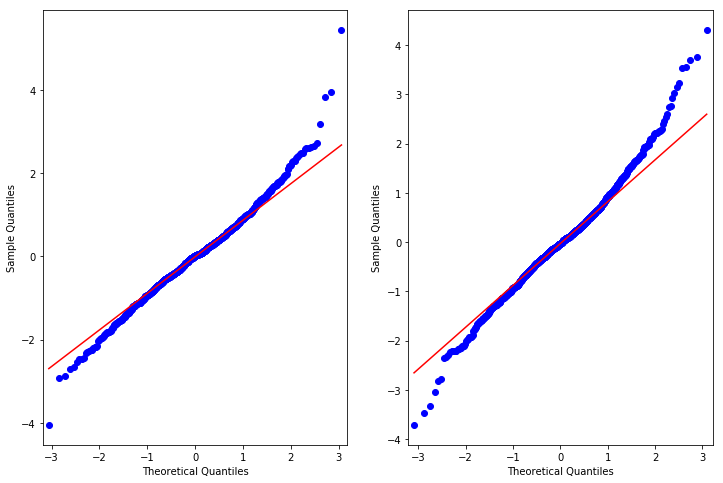

In [213]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
fig = sm.qqplot(arima_mod.resid, line='q', ax=ax, fit=True)
ax = fig.add_subplot(122)
fig = sm.qqplot(arma_mod.resid, line='q', ax=ax, fit=True)

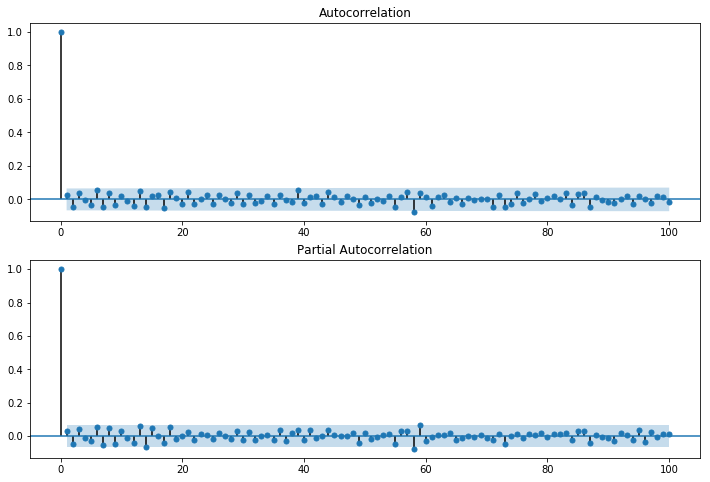

In [214]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod.resid, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod.resid, lags=100, ax=ax2)